# Grade: /100 Mark(s)

# Assignment 03: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [56]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model

### Question 1: /10 Marks

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


#### Written Answer:

When we set lam equals to 0 or negative, the $\ln(\lambda)$ is then undefined, so the output value is nan

In [57]:
def poissonNegLogLikelihood(lam,y):
    
    # Read up on the gamma function to make sure you get the likelihood right!
    neg_log_lik = - np.sum(y * np.log(lam) - lam)
    return neg_log_lik

test_val = poissonNegLogLikelihood(1.3, np.array([2,1,0,0]))
test_val_2 = poissonNegLogLikelihood(np.array([1,0.5,1,3]), np.array([2,1,0,0]))
print(test_val)
print(test_val_2)

4.412907206597527
6.193147180559945


---

### Question 2: /10 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [58]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X, b))
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam,y)
    return neg_log_lik

b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])
test_val = poissonRegressionNegLogLikelihood(b, X, y)
print(test_val)

3211.7843052468816


### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) We need to avoid the value to be negative.

b) A negative lambda will let the result be nan.

### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [59]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X, b))
    return yhat

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
modelPrediction(b, X)

array([ 148.4131591 , 2980.95798704,  148.4131591 ])

### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [60]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y), method="Powell", tol=1e-8)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
fitModel(X,y)

array([ 0.94827555, -0.52953518])

### Question 6: /15 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

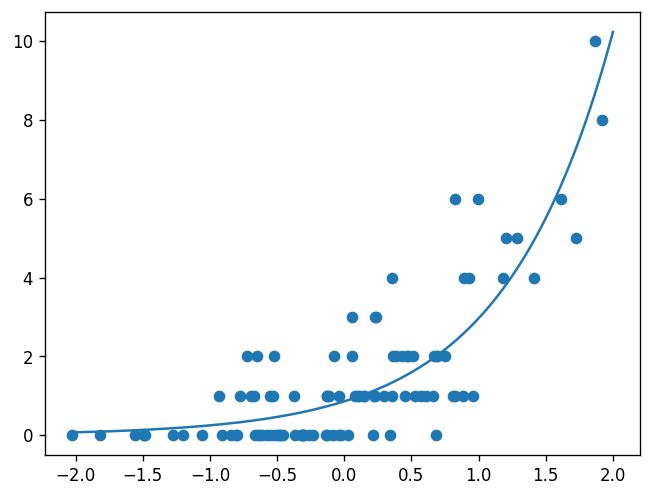

In [61]:
# Loading in the data.  
df = pd.read_csv("poisson_regression_data.csv")

fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 

# Fit the model.  Use your functions.  
x = df.x.values 
X = np.transpose(np.concatenate([[np.ones(len(df))], [x]]))
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X, y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(newx.size), newx]

# Make predictions on the new data
y_predicted = modelPrediction (betas, newX)

#Finally, plot the predictions on the same axis and color the predictions red
x = df.x.values 
y= df.y.values
ax.scatter(x, y)
ax.plot(newx, y_predicted)


### Question 7: /20 Mark(s)
We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 5 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0.0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:
attempts | escapes| probability
|---|---|---|
|10|x1|y1|
|65|x2|y2|
|...|...|...|
|1000|x19|y19|

In [62]:
attempts = np.linspace(10, 1000, 19)
x    = 50       # box size in x-direction
y    = 50       # box size in y-direction
time = 600      # in seconds

# coordinate of one arbitrary opening of size 5 mm:
### your stuff
x_bound = 0
y_left_bound = 10
y_right_bound = 15

# distance in millimeters that the ant travels per second
delta  = 2

### your stuff
escapes = []
for M in attempts:
    escape = 0
    for trial in range(int(M)):
        ### your stuff
        curX, curY = 25, 25 # it will be always placed on the center
        for t in range(time):
            action = np.random.uniform(low = 0.0, high = 1)
            if (action < 0.25):                     # move left
                curX -=  delta
            if (action >= 0.25 and action < 0.5):   # move right
                curX +=  delta
            elif (action >= 0.5 and action < 0.75): # move up
                curY -= delta
            else:                                   # move down
                curY += delta

            if (curX >= 25): curX = 25
            if (curX <= 0): curX = 0
            if (curY >= 25): curY = 25
            if (curY <= 0): curY = 0
            if (curX == x_bound and curY >= y_left_bound and curY <= y_right_bound):
                escape += 1
                break
    escapes.append(escape)

escapes = np.array(escapes)
df_attempts = pd.DataFrame(attempts, columns=['attempts'])
df_escapes = pd.DataFrame(escapes, columns=['escapes'])
df_probability = pd.DataFrame(escapes / attempts, columns=['probability'])   

ant = pd.concat([df_attempts, df_escapes, df_probability], axis=1)
ant.head()

,attempts,escapes,probability
0,10.0,1,0.100000
1,65.0,4,0.061538
2,120.0,9,0.075000
3,175.0,14,0.080000
4,230.0,18,0.078261


### Question 8: /5 Mark(s)
Explore the dataframe created in the previous step. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event? 

In [63]:
ant

,attempts,escapes,probability
0,10.0,1,0.100000
1,65.0,4,0.061538
2,120.0,9,0.075000
3,175.0,14,0.080000
4,230.0,18,0.078261
5,285.0,25,0.087719
6,340.0,31,0.091176
7,395.0,35,0.088608
8,450.0,47,0.104444
9,505.0,57,0.112871


#### Written Answer:

Yes, the probability seems to converge around 0.08 to 0.10, so I will report the probability as 0.09

### Question 9: /10 Mark(s)
Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?

[0.         0.09043062]


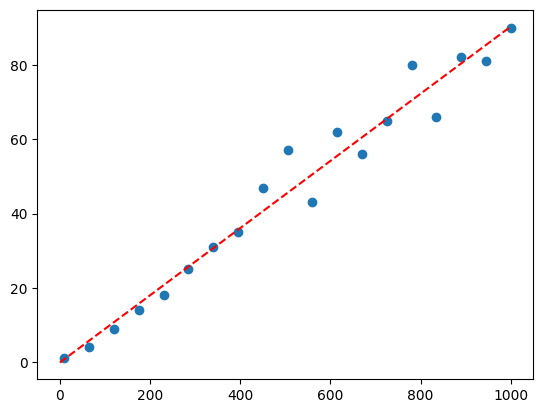

In [64]:
### your stuff
x = ant['attempts']
X = np.transpose(np.concatenate([[np.ones(len(ant))], [x]]))

y = ant['escapes']

leg = linear_model.LinearRegression().fit(X, y)

newx = np.linspace(0, 1000, 100)
newX = np.c_[np.ones(newx.size), newx]
y_pred = leg.predict(newX)

plt.plot(newX[:,1], y_pred, color='red', linestyle='--')
plt.scatter(x, y)

print(leg.coef_)

#### Written Answer:
The result are similiar to my previous because the coefficients predicts how many escapes corresposding to the number of attempts.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.